In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print('Coefficients:', lr.coef_)
y_pred = lr.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))


Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
MSE: 2900.193628493482


In [ ]:
#Ridge/Lasso Tuning (Housing)
ridge = Ridge()
lasso = Lasso()
alphas = np.logspace(-4, 4, 20)

ridge_grid = GridSearchCV(ridge, {'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print('Best Ridge alpha:', ridge_grid.best_params_)

lasso_grid = GridSearchCV(lasso, {'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print('Best Lasso alpha:', lasso_grid.best_params_)


Best Ridge alpha: {'alpha': np.float64(0.08858667904100823)}
Best Lasso alpha: {'alpha': np.float64(0.08858667904100823)}


In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Breast Cancer Classification
cancer = load_breast_cancer()
X_c, y_c = cancer.data, cancer.target
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42, stratify=y_c)

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_c, y_train_c)
y_pred_c = logreg.predict(X_test_c)
print('Accuracy:', accuracy_score(y_test_c, y_pred_c))

Accuracy: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Logistic Hyperparam Tuning
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
log_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000, solver='liblinear'), param_grid, cv=5, scoring='accuracy')
log_grid.fit(X_train_c, y_train_c)
print('Best params:', log_grid.best_params_)
print('Test Acc:', log_grid.score(X_test_c, y_test_c))

Best params: {'C': 10, 'penalty': 'l1'}
Test Acc: 0.9824561403508771


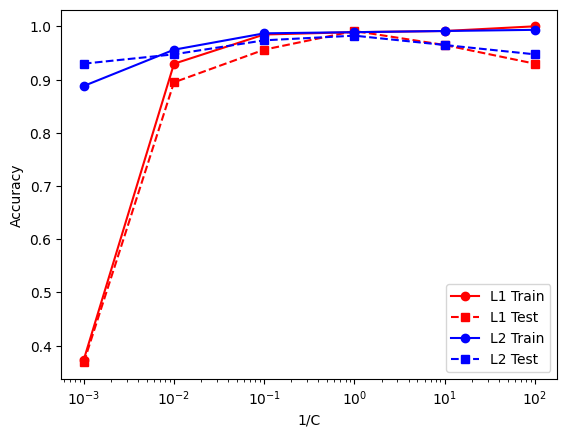

In [27]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

#L1 vs L2 Plot
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
train_l1, test_l1 = [], []
train_l2, test_l2 = [], []

for C in Cs:
    log_l1 = LogisticRegression(penalty='l1', C=C, solver='liblinear', random_state=42, max_iter=1000)
    log_l1.fit(X_train_c_scaled, y_train_c)
    train_l1.append(log_l1.score(X_train_c_scaled, y_train_c))
    test_l1.append(log_l1.score(X_test_c_scaled, y_test_c))

    log_l2 = LogisticRegression(penalty='l2', C=C, random_state=42, max_iter=1000)
    log_l2.fit(X_train_c_scaled, y_train_c)
    train_l2.append(log_l2.score(X_train_c_scaled, y_train_c))
    test_l2.append(log_l2.score(X_test_c_scaled, y_test_c))

plt.semilogx(Cs, train_l1, 'r-o', label='L1 Train')
plt.semilogx(Cs, test_l1, 'r--s', label='L1 Test')
plt.semilogx(Cs, train_l2, 'b-o', label='L2 Train')
plt.semilogx(Cs, test_l2, 'b--s', label='L2 Test')
plt.xlabel('1/C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()